In [130]:
import numpy as np
import math
import random
from random import seed
from random import random
from numpy import linalg as LA

In [131]:
m=500
N=2000

In [132]:
A=np.random.rand(m,N) # measurement matrix
s=2 # sparsity

x =np.zeros((N,1))
xnminusx=np.array
xminusxnorm=[]

In [113]:
import random
randomlist = random.sample(range(0, N-1), 2)
print(randomlist)  # indeces for non zero values

[1644, 732]


In [114]:
from random import random

for i in randomlist:
    x[i]=random()  

y=A.dot(x)  

xn=np.zeros((N,1))
xn1=np.zeros((N,1)) #xn+1

In [115]:
#xnminusx=np.array
#xminusxnorm=np.array

In [116]:
def hard_thresh(x_mat,s):  # function for hard thresholding
    n=len(x_mat)
    val=[]
    
    x_mat_temp=np.array
    x_mat_temp=np.absolute(x_mat)
    ind=x_mat_temp.argsort(axis=0)
    
    val=ind[-s:]
    
    for i in range(n):
        if i not in val:
            x_mat[i]=0
        
             
    return(x_mat)

In [117]:
def plot_xn_vs_x(xn,x):
    diff=xn-x
    #xnminusx=np.array
    #xnminusx=np.append(xnminusx,diff)
    xminusxnorm.append(LA.norm(diff))
    return xminusxnorm
    
    

In [118]:
def iht_algo (A,y,s,h,max_iter,tol,xn,x):
    iteration=0
    rel_inc=[]
    residual=[]
    rel_incr=10
    
    xnminusx=np.array
    xminusxnorm=np.array
    
    
    xn1=np.zeros((N,1)) #xn+1
    
    while iteration<max_iter and rel_incr>tol:
        A_tol=A.transpose()
        xn1=xn+(h*(A_tol.dot((y-(A.dot(xn))))))
        xn1=hard_thresh(xn1,s)
        
        rel_incr=LA.norm(xn1-xn)/LA.norm(xn1)
        rel_inc.append(rel_incr)
        
        residual.append(LA.norm((A.dot(xn1))-y))
        
        iteration=iteration+1
        
        xminusxnorm=plot_xn_vs_x(xn1,x)
        
        xn=xn1
           
    return xn,rel_inc,residual,iteration,xminusxnorm 

In [119]:
xnplus1,rel_inc,residual,iters,xminusxnorm=iht_algo(A,y,s,0.001,1000,0.00001,xn,x)

In [120]:
iters

153

In [121]:
for i in randomlist:  # compare values of x and xn1 after final iteration
    print(i)
    print(xnplus1[i])
    print(x[i])
    print("_____________")

1644
[0.76147231]
[0.76127493]
_____________
732
[0.95833105]
[0.95853153]
_____________


In [122]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Residual')

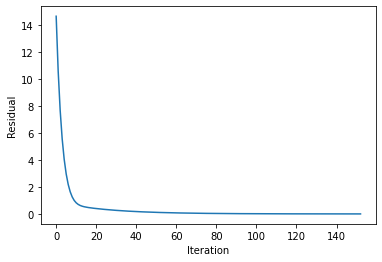

In [123]:
plt.plot(residual)  # plot of residual for each iteration
plt.xlabel("Iteration")
plt.ylabel("Residual")
#plt.yscale('log')

Text(0, 0.5, 'Relative increment')

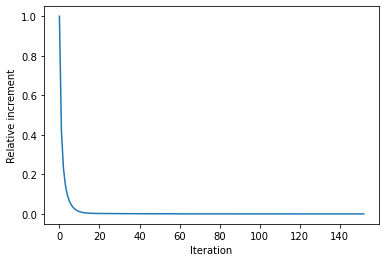

In [124]:
plt.plot(rel_inc)  # plot of relative increment for each iteration
plt.xlabel("Iteration")
plt.ylabel("Relative increment")
#plt.yscale('log')

Text(0, 0.5, 'norm(xn-x)')

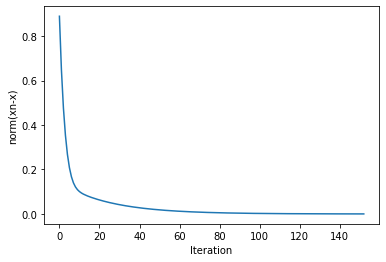

In [126]:
plt.plot(xminusxnorm)  # plot of ||xn-x||
plt.xlabel("Iteration")
plt.ylabel("norm(xn-x)")    

In [ ]:
#plt.plot(xnminusx)  # plot of xn-x
#plt.xlabel("Iteration")
#plt.ylabel("xn-x") 